In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_autos.csv")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [80]:
df.seller.unique()

array(['privat', 'gewerblich'], dtype=object)

In [50]:
df.groupby("vehicleType")[["price"]].min()

,price
vehicleType,
Other,0
andere,0
bus,0
cabrio,0
coupe,0
kleinwagen,0
kombi,0
limousine,0
suv,0


In [81]:
df.groupby("vehicleType")[["price"]].max()

,price
vehicleType,
Other,3700
andere,8350
bus,13900
cabrio,21400
coupe,24299
kleinwagen,5765
kombi,13049
limousine,12800
suv,28800


In [51]:
vehicle_type_range = df.groupby("vehicleType")[["price"]].max() - df.groupby("vehicleType")[["price"]].min()
vehicle_type_range

,price
vehicleType,
Other,3700
andere,8350
bus,13900
cabrio,21400
coupe,24299
kleinwagen,5765
kombi,13049
limousine,12800
suv,28800


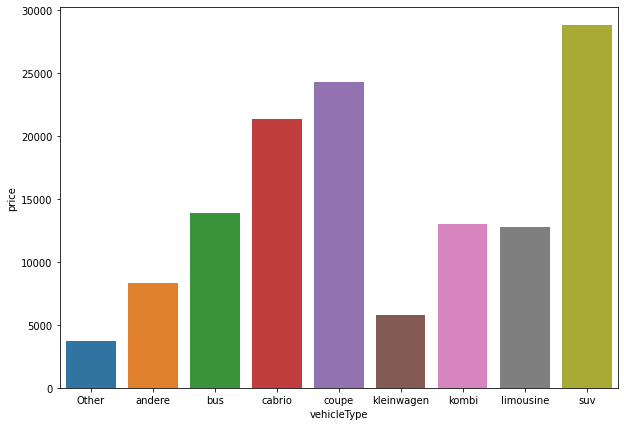

In [97]:
plt.figure(figsize=(10,7))
sns.barplot(x=vehicle_type_range.index,y=vehicle_type_range.price);

In [46]:
vehicle_type_mean = df.groupby("vehicleType")[["price"]].mean()
vehicle_type_mean

,price
vehicleType,
Other,861.466447
andere,2400.906465
bus,4677.360601
cabrio,6934.699382
coupe,6741.053960
kleinwagen,1730.123085
kombi,3961.032129
limousine,3745.179122
suv,10772.809349


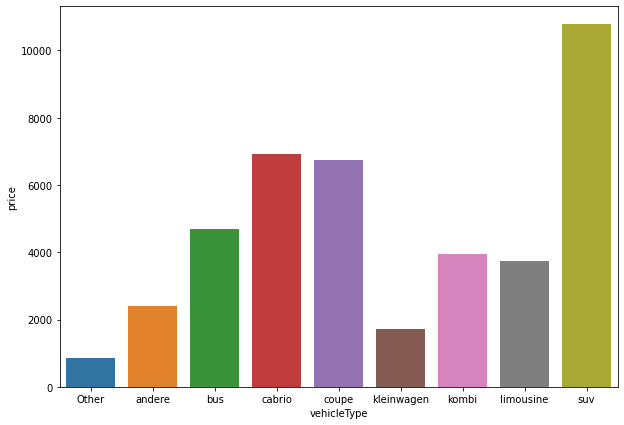

In [96]:
plt.figure(figsize=(10,7))
sns.barplot(x=vehicle_type_mean.index,y=vehicle_type_mean.price);

In [95]:
vehicle_gearbox = df.groupby(["vehicleType","gearbox"])[["price"]].mean()
vehicle_gearbox

price
vehicleType gearbox                  
Other       Unspecified    637.746376
            automatik     1216.928197
            manuell        966.845311
andere      Unspecified   1234.450893
            automatik     2901.823293
            manuell       2456.987680
bus         Unspecified   3483.163660
            automatik     5719.686344
            manuell       4547.567803
cabrio      Unspecified   4758.811679
            automatik     9014.381548
            manuell       6448.555657
coupe       Unspecified   4861.688699
            automatik     9546.569811
            manuell       5642.117982
kleinwagen  Unspecified   1510.675239
            automatik     2081.985513
            manuell       1713.291610
kombi       Unspecified   2549.287303
            automatik     5211.097242
            manuell       3627.133530
limousine   Unspecified   2645.573072
            automatik     4907.464613
            manuell       3452.534156
suv         Unspecified   6073.769006
            automatik    12631.579861
            manuell       9379.936829

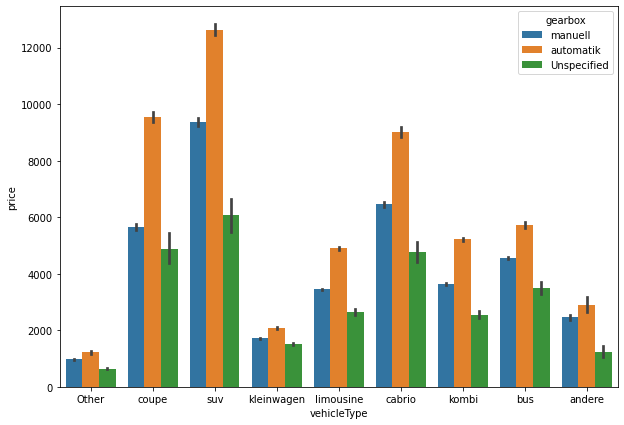

In [111]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.vehicleType, y=df.price, hue=df.gearbox);

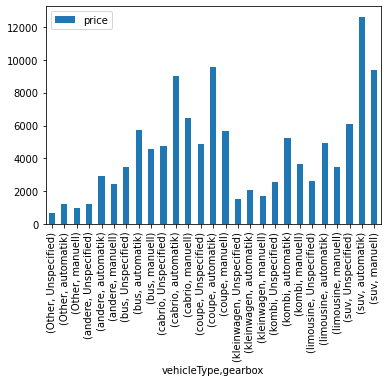

In [106]:
vehicle_gearbox.plot.bar();

In [103]:
fuel_type = df.groupby(["fuelType","gearbox"])[["price"]].mean()
fuel_type

price
fuelType gearbox                 
Cng      Unspecified  2646.307692
         automatik    5110.156250
         manuell      4112.617711
Diesel   Unspecified  3231.736023
         automatik    7998.659897
         manuell      5221.182161
Electric Unspecified  2507.500000
         automatik    5862.105263
         manuell      2136.363636
Gasoline Unspecified  1909.750207
         automatik    5171.383895
         manuell      3012.665925
Hybrid   Unspecified  1332.250000
         automatik    8904.259615
         manuell      5166.871795
Lpg      Unspecified  2615.610169
         automatik    5539.479830
         manuell      3122.458607
Other    Unspecified  1108.366890
         automatik    3370.234189
         manuell      1732.633224

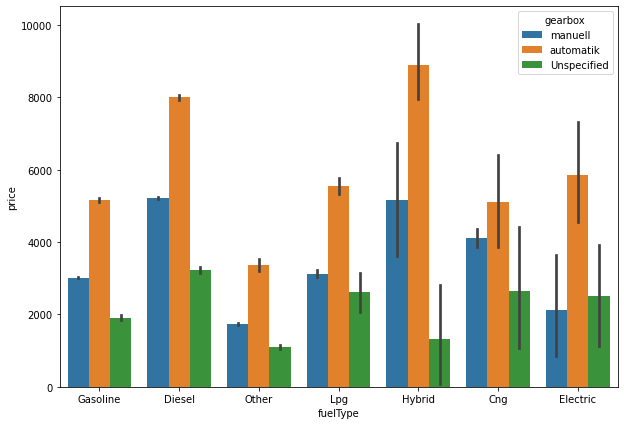

In [114]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.fuelType, y=df.price, hue=df.gearbox);

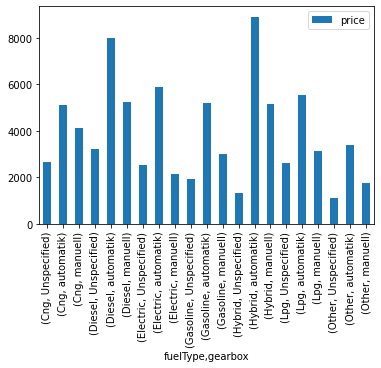

In [105]:
fuel_type.plot.bar();